# Lecture 15 - Sorting

## Overview, Objectives, and Key Terms
 
In this lecture and [Lecture 14](Searching.ipynb), we tackle two of the most important practical problems in computing: *searching* and *sorting*.  In this lecture, we turn to *sorting*, the more challenging problem and one that was a focus of much research in the early years of computing for making searching easier.  We'll flex our knowledge of functions to help write clean and clear sorting programs.

### Objectives

By the end of this lesson, you should be able to

- Sort an array of numbers using brute-force, $\mathcal{O}(n^2)$ schemes like *selection sort*.
- Sort an array of numbers using divide-and-conquer, $\mathcal{O}(n\log n)$ schemes like *merge sort*.
- Apply built-in Python functions to sort sequences.

### Key Terms

- selection sort
- stable sorting algorithm (*hint*: see the exercises)
- merge sort
- merge 
- divide and conquer

## Sorting is Hard Work

Sorting a sequence of randomly arranged items is no easy task, often resulting in a lot of repetive motions and paper cuts (if the items are, e.g., student exams).  However, computers are great for such repetition, and they don't seem to suffer those paper cuts.  The question is: *how to sort*?  Sorting, it turns out, presents a rich opportunity for integrating much of the material covered so far.

The simplest sorting algorithm is based on brute force and leverages the solution to a problem encountered as early as [Lecture 5](Algorithms_Flowcharts_and_Pseudocode.ipynb): finding the minimum value of a sequence of numbers.  The basic idea is simple.  Given a sequence of $n$ numbers to sort in increasing order, we 

1. Find the smallest value (just as we have previously done).
2. Swap it with the first element in the sequence.
3. Repeat steps (1) and (2) for the last $n-1$ items in the sequence.

This algorithm is known as [selection sort](https://en.wikipedia.org/wiki/Selection_sort).  In more detailed pseudocode, **selection sort** can be written as

```
'''The selection sort algorithm to sort an array'''
Input: a, n # sequence of numbers and its length
# Loop through each element a[i] 
Set i = 0
While i < n do
   # Find the location k of the smallest element after a[i]
   Set j = i + 1
   Set k = i
   While j < n do
       If a[j] < a[k] then
           Set k = j
       Set j = j + 1
   # Switch the values of a[i] and a[k], putting them in order
   Swap a[i] and a[k]
   i = i + 1
```

Take some time and digest this algorithm.  Then try the following exercises:

***

**Exercise**: Apply this algorithm to the sequence [5, 3, 7].  For each value of `i` and `j`, write out, using pen and paper, the values of `i`, `j`, `k`, `a[i]`, `a[j]`, `a[k]`, `a[j] < a[k]`, and `a` *before* the conditional statement.

*Solution*:  

```
i    j    k    a[i]    a[j]    a[k]   a[j] < a[k]    a
-------------------------------------------------------------
0    1    0     5       3       5        True       [5, 3, 7]
0    2    1     5       7       3        False      [5, 3, 7] 
1    2    1     5       7       5        False      [3, 5, 7]
2    3    2     7      N/A      7        N/A        [3, 5, 7] 
```

***

**Exercise**: Repeat the above exercise for the sequence [4, 1, 8, 2, 3].

***

**Exercise**: What happens to `a[i]` if `a[j]` is never less than `a[k]`?  

***

**Exercise**: Produce a flowchart for this algorithm.

***

**Exercise**: Apply this algorithm to the sequence [3, $1_0$, 4, $1_1$, 2].  Here, the subscript is used to count the number of times a 1 appears in the sequence.  Does the algorithm produce [$1_0$, $1_1$, 2, 3, 4] or [$1_1$, $1_0$, 2, 3, 4]?  A sorting algorithm is **stable** if it preserves the original order of equal values (i.e., $1_0$ and then $1_1$).

***

Let's put selection sort into practice using Python.  Because sorting is something to be done for any array, it makes sense to implement the algorithm as a function:

In [1]:
def selection_sort(a):
    """Applies the selection sort algorithm to sort the sequence a."""
    i = 0
    while i < len(a):
        j = i + 1
        k = i
        while j < len(a):
            if a[j] < a[k]:
                k = j
            j += 1
        a[i], a[k] = a[k], a[i]
        i += 1
    return a

In [2]:
selection_sort([5, 3, 7])

[3, 5, 7]

In [3]:
selection_sort([5, 4, 3, 2, 1])

[1, 2, 3, 4, 5]

Download this notebook or copy the function above into your own Python file.  Then tackle the exercises that follow.

***

**Exercise**:  Define `x = [5, 3, 7]` and execute `y = selection_sort(x)`.  Print both `x` and `y`.  Why are they the same?  In other words, why is `x` also sorted?

*Solution*: Remember, `y = x` does not produce a copy of `x`.  Rather, `x` and `y` are now just two names for the same data.  Similarly, when `x` is passed to `selection_sort`, it is given the new name `a` within the function, and any changes to `a` lead to changes in `x`.  Because `a` is returned and assigned to `y`, `y` and `x` are two names for the same (now sorted) `list`.

***

**Exercise**:  Define `x = (5, 3, 7)` and execute `y = selection_sort(x)`.  Why does it fail?

***

**Exercise**:  Modify `selection_sort` so that it sorts and returns a *copy* of `a`, making it suitable for sorting `tuple` variables.

***

**Exercise**:  Modify `selection_sort` so that it optionally sorts a sequence in decreasing order.  The function `def` statement should look like `def selection_sort(a, increasing=True):`.

*Solution*: A one-line change is to switch `a[j] < a[k]` with `a[j] < a[k] if increasing else a[k] < a[j]`.  Otherwise, an `if/elif` structure would work just as well.  Revisit [Lecture 6](Conditional_Statements_and_the_Structure_of_Python_Code) for more tertiary `if` statements of the form `a if b else c`.  Verify this works!

***

**Exercise**: Modify `selection_sort` so that it uses `for` loops instead of `while` loops.  Check your result against the version provided above.

***

**Exercise**:  Could `while i < len(a)` be changed to `while i < len(a) - 1`?  Why or why not?

*Solution*.  Yes!  Doing so would skip the loop when `a` has a single element, for which sorting is not required anyway.

***

## Quantifying that Hard Work

So what's the *order*  of this algorithm?  In other words, given a sequence of $n$ elements, how many comparisons must be made?  

Let's break it down a bit.  The algorithm is comprised of two loops.  The first one must go through all the elements of `a`.  For each value of `i`, the second loop makes `n - i` comparisons.  In other words, we have something like 
```
i     # comparisons
-------------------
0       n
1       n - 1
2       n - 2
...     ...
n - 3   3
n - 2   2
n - 1   1
```

That total looks an awful lot like $1 + 2 + \ldots + (n - 1) + n$, and that sum is $n(n+1)/2 = n^2/2 + n/2$.  Because $n \ll n^2$ for large $n$, the algorithm is $\mathcal{O}(n^2)$.  That's expensive, and for large sequences, we could wait a long, long time for the sort to finish. 

Let's verify that selection sort is $\mathcal{O}(n^2)$ by performing a little experiment.  As done in [Lecture 14](Searching.ipynb) to assess the linear search, we can generate random sequences of different sizes using NumPy.  Then, we can sort them with selection sort and time how long it takes to do so for each size.

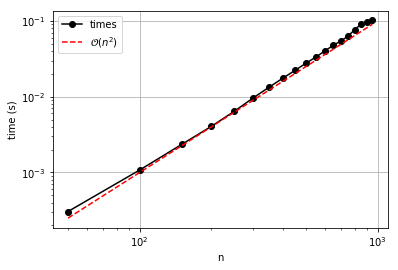

In [4]:
"""Program to show time as a function of size for selection sort."""
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Set the seed to keep the output fixed
np.random.seed(1234)

# Set the n values and initialize a list for times
n_values = np.arange(50, 1000, 50)
t_values = []

for n in n_values:
    # Generate an array of random numbers
    a = np.random.rand(n)
    # Start the timer
    t_start = time()
    # Do the search
    selection_sort(a)
    # Determine the elapsed time (in seconds) and save it
    t_elapsed = time() - t_start
    t_values.append(t_elapsed)
    
# Plot the times vs values on a log log plot.
# Also, an expected "trend" line is included.
plt.figure(1)
plt.loglog(n_values, t_values, 'k-o', label='times') 
plt.loglog(n_values, 1e-7*n_values**2, 'r--', label='$\mathcal{O}(n^2)$')
plt.grid(True)
plt.xlabel('n')
plt.ylabel('time (s)')
plt.legend()

It appears that the order is confirmed because the two lines are approximately parallel (for large enough $n$), and that the impact on time is as expected.  Basically, each comparison (which requires accessing two elements of `a`) requires a certain amount of time.  If the number of comparisons is goes as $n^2$, and the time goes with the number of comparisons, then selection sort is **100 times more expensive** for an array of size $10n$ than for an array of size $n$.  That's huge, and better methods are surely needed for the massive data sets out in the real world that must be sorted (think Google searches and other everyday lists with thousands of entries).

***

**Exercise**: The results from the numerical experiment suggest that an array of 100 elements takes about 0.001 s to sort using the selection sort algorithm.  About how many seconds would you expect the same algorithm to take for 1 million elements?

***

## Better Sorting for Bigger Data

We saw in [Lecture 14](ME400_Lecture_14.ipynb) that the task of searching a pre-sorted array could be done in as few as $\mathcal{O}(n \log n)$ operations.  The trick was to split identify which half of a sequence contained the element, and to keep splitting the domain in half at every iteration until the element in question was found.  It was even suggested that such a **binary search** is a form of divide and conquer: split the work into ever smaller chunks and solve the smaller problems more quickly.  

The same principle is the foundation of many of the most successive algorithms ever, including [quicksort](https://en.wikipedia.org/wiki/Quicksort), probably the most widely search algorithms, and the [fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform), which drives much of signal processing across multiple domains.  Often, and as true for these algorithms, divide and conquer takes one from $\mathcal{O}(n^2)$ to $\mathcal{O}(n \log n)$, a huge savings.

For our purposes, it is sufficient to consider the simplest of the divide and conquer approaches to sorting: [merge sort](https://en.wikipedia.org/wiki/Merge_sort).  The algorithm combines two very simple ideas: (1) divide a sequence into smaller chunks that can be sorted directly and (2) merge two sorted (sub)sequences. 

### Merging Sorted Sequences

The fundamental work done by mergesort is to merge two smaller, *sorted* sequences into one larger, *sorted* sequence.  For example, if one starts with `a = [1, 8]` and `b = [5, 7]`, the result of *merging* `a` and `b` should be `c = [1, 5, 7, 8]`.  

How is this accomplished?  We know the total number of elements to be merged (here, that's 4).  Each element of the new, sorted sequence `c` can be defined by choosing the lowest of the remaining elements in `a` and `b`.  Because `a` and `b` are sorted, we can keep track of which elements have already been selected with two counters (one for `a` and one for `b`).  If the counter for `a` is equal to the length of `a` (i.e., all elements of `a` have been merged), then all of the remaining elements of `c` must come from `b`.  The same goes if the `b` counter equals the length of `b`.

That's all a mouthful, for sure.  The idea can be shown more succinctly in pseudocode:

```
'''Merge: an algorithm to merge two sorted sequences'''
Input: a, b 
Set m to the length of a
Set n to the length of b
# Initialize the sorted sequence
Set c to be a sequence of length (m+n) 
# Initialize the counter for a, b, and c
Set i = 0
Set j = 0
Set k = 0
While k < m + n do
    If i < m and j < n then
        # Both a and b still have elements to merge
        If a[i] <= b[j] then
            Set c[k] = a[i] 
            Set i = i + 1
        Otherwise
            Set c[k] = b[j]
            Set j = j + 1
    Otherwise, if i == m then
        # Only b has elements left to merge
        Set c[k] = b[j]
        Set j = j + 1
    Otherwise,
        # Only a has elements left to merge
        Set c[k] = a[i]
        Set i = i + 1
    Set k = k + 1
Output: c
```

Take some time and digest this algorithm.  Then try the following exercises:

***

**Exercise**: Apply this algorithm to  `a = [1, 3, 8]` and `b = [2, 5, 7]`.  Trace it by hand using the tecniques employed earlier in the course.

***

**Exercise**: Implement this algorithm as the Python function `merge(a, b)`.

***

**Exercise**: Is merge sort stable?  Try it on [3, 1$_0$, 4, 1$_1$, 2].

***

### Divide and Conquer

Merging is half thee battle: we need to dive down and get the smaller arrays to sort.  A natural approach is to use recursion.  Here is a function that will divide a sequence and print out subsequences.  

In [5]:
def divide_and_print(a):
    print('-'*len(a)+'>', a)
    if len(a) <= 2:
        return
    else:
        divide_and_print(a[:len(a)//2])
        divide_and_print(a[len(a)//2:])
    return
divide_and_print([8,7,6,5,4,3,2,1])

--------> [8, 7, 6, 5, 4, 3, 2, 1]
----> [8, 7, 6, 5]
--> [8, 7]
--> [6, 5]
----> [4, 3, 2, 1]
--> [4, 3]
--> [2, 1]


The output of this function clearly shows how the original sequence is divided at each level of recursion.  Like all recursive functions, there needs to be a termination criterion (or guard).  Here, if the sequence has two or fewer elements, the function returns without further dividing `a`.

To apply the basic idea of `divide_and_print` to sorting, the sequence must be sorted at the bottom level (i.e., when `len(a) <= 2`) and merged at successive levels.  For example, the very first chunk of `a` is the subsequence `[8, 7]`.  That is easily sorted by simple comparison: since `8 > 7`, swap the elements to yield (and return) `[7, 8]`.  The next chunk is `[6, 5]`, which is also reversed to `[5, 6]`.  These sorted subsequences of two elements can then be merged.

Here is the full algorithm in pseudocode, where `Call` indicates that an algorithm (think a function, here) is to be supplied some input and is to provide some output:

```
'''Merge Sort: an algorithm to sort the sequence a'''
Input: a
Set n to the length of a
If n == 2 and a[0] > a[1] then
    Swap a[0] and a[1]
Otherwise, if n > 2 then
    Set a_L to be the first half of a 
    Set a_R to be the second half of a
    Call Merge Sort to sort a_L and assign 
      its output to a_L
    Call Merge Sort to sort a_R and assign
      its output to a_R
    Call Merge to combine a_L and a_R, and assign
      its output to a
# Note, nothing is done when n is 1
Output: a
```

Although perhaps not obvious, the merge sort algorithm is $\mathcal{O}(n\log n)$.  Given $n$ elements in a sequence, the algorithm divides the array into smaller chunks $\log_2 n - 1$ times.  For example, if one starts with 16 elements, those are then divided into subsequences with 8 elements, and then 4, and then 2.  That is $\log_2 16 - 1 = 3$ levels.  At the last (deepest) level with subsequences of 1 or 2 elements, up to one comparison is made to decide whether to swap the elements or not.  For all other levels, the merge algorithm is applied.  To merge two sequences each of length $m$ requires at least $m$ comparisons (and up to $2m$ comparisons).  Because all $n$ elements of the original sequence are merged at every level (albeit as part of smaller subsequences), up to $2n$ comparisons are therefore required per level.  Hence, there are up to approximately $(\log_2 n - 1)\cdot 2n = \mathcal{O}(n\log n)$ comparisons.

Spend some time and digest this alorithm.   Then tackle the following exercises.


***

**Exercise**: Apply this algorithm to `[6, 5, 4, 3, 2, 1]` and trace its progress by hand, writing down the value of `a` at the beginning of each call to Merge Sort.  Number these calls in the order in which they are made.  (In other words, predict what would happen if `a` were printed after `Input`.)

*Solution*: 

```
0      [6, 5, 4, 3, 2, 1]
1      [6, 5, 4]
2      [6] 
3      [5, 4]             
4      [3, 2, 1]          
5      [3]     
6      [2, 1]  
```

***

**Exercise**: Implement this algorithm as the Python function `merge_sort(a)`.  

***

**Exercise**: How many comparisons are made for `a = [6, 5, 4, 3, 2, 1]`?  Make sure to include the comparisons made when merging.  How does this compare to selection sort?

***

**Exercise**: Suppose you implement merge sort (correctly) in Python and use it to sort a list of 100 elements.  If the time required to sort 100 elements is about 0.001 s, how long would it take to sort a list with 1 million elements?

*Solution*: $t \approx \frac{10^6 \log 10^6}{100 \log 100} \times 0.001~\text{s}= 30~\text{s}$.

***

**Exercise**: Develop a modified merge sort algorithm that does not use recursion.  *Hint*: start simple and reproduce the behavior of `divide_and_print` using only loops.

***

##  Built-in Sorting

Sorting is so fundamental that algorithms are often implemented by default in high-level languages (like Python, MATLAB, and C++).  In Python, the built-in `sorted` function accepts as input a sequence `a` and returns the sorted results:

In [6]:
sorted([3, 2, 1])

[1, 2, 3]

In [7]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



As `help` indicates, two optional arguments `key` and `reverse` can be provided.  By default, `reverse` is `False`, and a sequence is sorted in increasing order.  By setting `reverse=True`, the opposite order can be achieve:

In [8]:
sorted([1, 2, 3])

[1, 2, 3]

In [9]:
sorted([1, 2, 3], reverse=True)

[3, 2, 1]

The `key` argument is `None` by default.  Any other value passed must be a callable function that is given an item of the sequence and returns a value to be used when comparing that item to others. 

Consider, for example, the list `a = [1, 2, 3]`. The value of `a[0]` is 1, while `a[1]` is 2.  Hence, `a[0] < a[1]` is `1 < 2` is `True`.  The result of this comparison (`True`) can be modified by using the `key` function to change the value of each item compared.  For example, if both `a[0]` and `a[1]` are *negated* before their comparison, the result  is `-1 < -2`, i.e., `False`.  Such a change produces a sorted array in reverse order:

In [10]:
sorted([1, 2, 3], key=lambda x: -x)

[3, 2, 1]

One can also define a key function using a standard `def` statement, or

In [11]:
def my_key_function(x):
    return -x # each item of the list is negated before comparing
sorted([1, 2, 3], key=my_key_function)

[3, 2, 1]

The `key` function can make sorting items with many components easier.  Those items could be the rows of a spread sheet whose components are the valiues in various columns.  Suppose such data were read from  `.csv` file to produce a list of each row of data, e.g.,

In [12]:
data = [("Julia", "Roberts", 2, 5), 
        ("Harrison", "Ford", 4, 1), 
        ("Meryl", "Streep", 3, 6)]

Perhaps obviously, these are famous names coupled with arbitrary numbers.  We can print out these items by last name via

In [13]:
for item in sorted(data, key=lambda x: x[1]):
    print(item)

('Harrison', 'Ford', 4, 1)
('Julia', 'Roberts', 2, 5)
('Meryl', 'Streep', 3, 6)


The `key` function returns `x[1]`, with is `Ford`, `Roberts`, or `Streep` for the given data.  Certainly, more complex data types (dictionaries, nested lists, etc.) may be similarly *keyed* and sorted.

***

**Exercise** Take this famous-person data and sort the three items in order based on the number of `e`'s in the last name.

***

Python's built-in `list` type has its own `sort` function.  Like `sorted`, it accepts optional `key` and `reverse` arguments:

In [14]:
help(list.sort)

Help on method_descriptor:

sort(...)
    L.sort(key=None, reverse=False) -> None -- stable sort *IN PLACE*



The major difference between `list.sort` and `sorted` is that `list.sort` sorts the elements *in place*.  In other words, `a.sort()` changes `a` directly, while `b = sorted(a)` produced a copy of `a`, sorts that copy, and then returns the sorted sequence, which is assigned to `b`.

Finally, `NumPy` provides its own `np.sort(a)` function to sort an array `a`.  It also accepts three optional arguments: `axis`, `kind`, and `order`.  By setting the axis (e.g., 0 for rows and 1 for columns in a 2-D array), the elements are sorted along that axis.  By default, the data is sorted along the last axis.  

For example, consider the following:

In [15]:
A = np.array([[3, 2, 1],[2,4,6],[1, 5, 10]])
A

array([[ 3,  2,  1],
       [ 2,  4,  6],
       [ 1,  5, 10]])

In [16]:
np.sort(A, axis=0)

array([[ 1,  2,  1],
       [ 2,  4,  6],
       [ 3,  5, 10]])

In [17]:
np.sort(A, axis=1)

array([[ 1,  2,  3],
       [ 2,  4,  6],
       [ 1,  5, 10]])

For sorting NumPy arrays, the `np.sort` function is most likely the fastest option. 

***

**Exercise**: Perform a numerical experiment like the one above for selection sort using `np.sort` with the optional argument `kind='mergesort'`.  Does its order appear to be $\mathcal{O}(n\log n)$?

***

## Further Reading

None at this time, but *sorting* is a rich topic for which many resources are available.  We've seen $\mathcal{O}(n^2)$ and $\mathcal{O}(n\log n)$ sorting.  Nothing is better (for general data), but there exist other algorithms (insertion, bubble, heap, and other sorts).  There's even one out there that of order $\mathcal{O}(n!)$.  Would you want to use it?